In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
db = pd.read_csv('water_potability.csv')
db

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
db.shape

(3276, 10)

In [4]:
db.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
db.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
db.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
db.fillna(db.mean(), inplace=True)

In [8]:
db.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
db.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


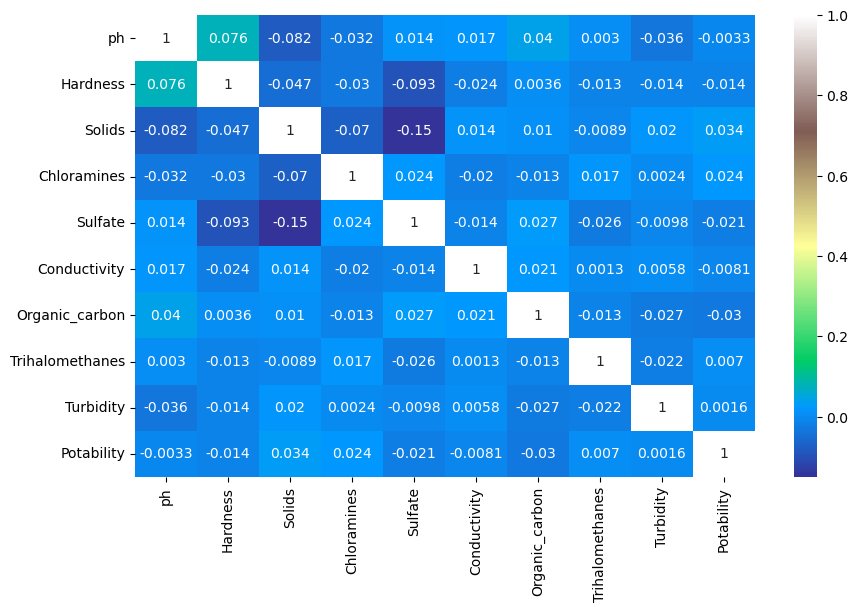

In [10]:
sns.heatmap(db.corr(), annot=True, cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

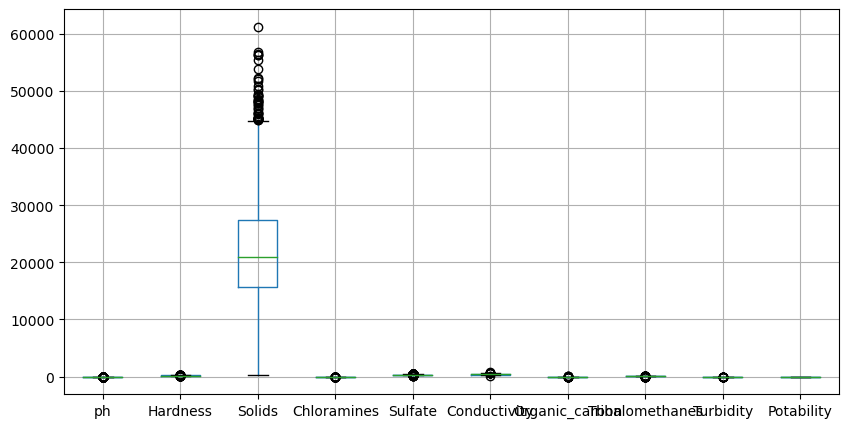

In [11]:
db.boxplot(figsize=(10,5))
plt.show()

In [12]:
db['Solids'].isnull().sum()

0

In [13]:
db['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

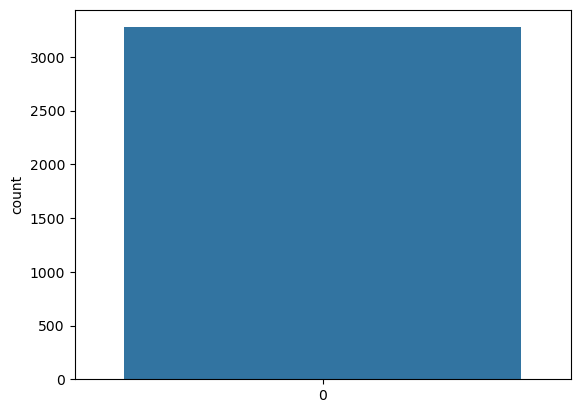

In [14]:
sns.countplot(db['Potability'])
plt.show()

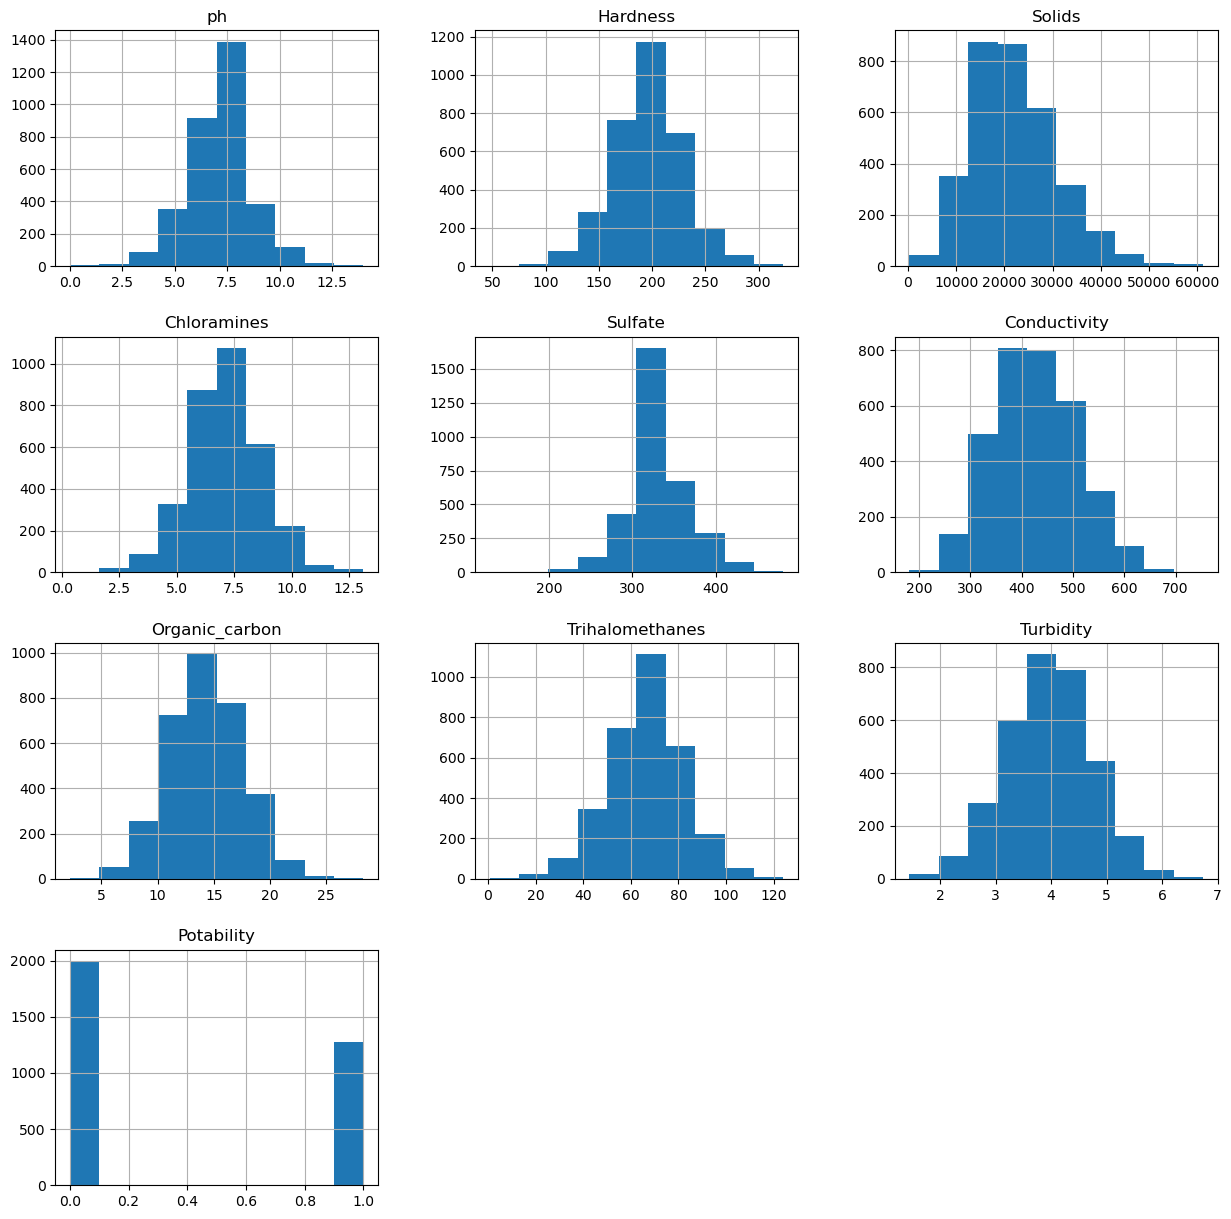

In [15]:
db.hist(figsize=(15,15))
plt.show()

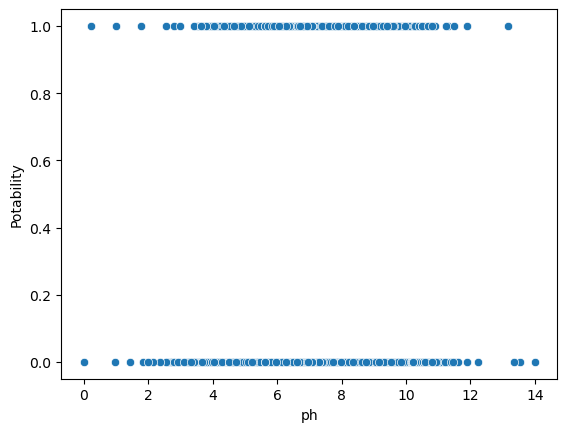

In [16]:
sns.scatterplot(x=db['ph'], y=db['Potability'])
plt.show()

In [11]:
X = db.drop('Potability', axis = 1) # Input Variable
y = db['Potability'] # Target Variable

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the Decision Tree Classifier model
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 8, splitter = 'best')

# Fit the model to your training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5960365853658537


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()

criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = range(1,10)

parameters = dict(criterion = criterion, splitter = splitter, min_samples_split = min_samples_split)
cv = RepeatedStratifiedKFold(n_splits = 5, random_state = 101)

grid_search_cv_dt = GridSearchCV(estimator = dt, param_grid = parameters, scoring = 'accuracy', cv = cv)


In [15]:
grid_search_cv_dt.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [16]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'best'}


In [17]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [18]:
accuracy_score(y_test, prediction_grid) * 100

59.60365853658537

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to your training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Mean Absolute Error (MAE): This metric measures 
# the average absolute difference between the predicted values and the true values.
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error (MSE): This metric measures 
# the average squared difference between the predicted values and the true values. It penalizes larger errors more than MAE.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Root Mean Squared Error (RMSE): RMSE is the square root of MSE and provides a measure of the average magnitude of error.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)  # Assuming you've already calculated MSE
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²): This metric indicates the proportion of the variance in the target variable that is predictable from 
# the independent variables. It ranges from 0 to 1, with higher values indicating better model fit.
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error: 287.2277546620517
Mean Squared Error: 96495.92438063642
Root Mean Squared Error: 310.6379313294441
R-squared (R²): -406682.8065016019


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create an instance of the Logistic Regression model
lr = LogisticRegression()

# Fit the model to your training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.3871951219512195


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to your training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5701219512195121


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
svm = SVC(kernel='linear')  # You can choose different kernel functions include linear, polynomial, 
                            # radial basis function (RBF), and sigmoid kernels.

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

svm = SVC(kernel='linear')

criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = range(1,10)

parameters = dict(criterion = criterion, splitter = splitter, min_samples_split = min_samples_split)
cv = RepeatedStratifiedKFold(n_splits = 5, random_state = 101)

grid_search_cv_dt = GridSearchCV(estimator = dt, param_grid = parameters, scoring = 'accuracy', cv = cv)